<a href="https://colab.research.google.com/github/eiwahab00works/BigDataAnalytics_Project/blob/main/BigDataAnalytic_FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Understanding**

The first part of the assignment focuses on **data ingestion**, which means bringing raw data into our pipeline so it can later be processed and analyzed.

There are two common ingestion approaches:

**Batch ingestion**: Data is collected and loaded in bulk at scheduled intervals (e.g., daily, weekly).

**Stream ingestion**: Data flows in continuously in real time (e.g., live sensors, API streams).

Since our dataset is **static** (not continuously updating), we are using batch ingestion.
This allows us to process large volumes of data at once and store it in an optimized format for future use.



---



**Step 1: Data Ingestion**
---


1️⃣ Data Source Selection

**Dataset**: Amazon Books Reviews

**Source**: Kaggle

The dataset contained two CSV files:

1.   books_data.csv — Book metadata (titles, authors, genres, etc.)
2.   Books_rating.csv — User ratings and review details.

Size of the Dataset is > 1GB.


---

**FLOW OF OUR WORKING**
---


CSV file (from Kaggle/Drive)
    
     ⬇

Read in Colab using Pandas
    
     ⬇

Convert to Parquet format
     
     ⬇

Store back to Drive (for next steps like Kafka or Lakehouse)

---

**What is Parquet format?**

The Parquet format was chosen because it is:

*   Columnar — stores data column-wise, making analytical queries faster.

*   Compressed — takes much less storage than CSV.

*   Schema-aware — retains data types and metadata automatically.


Optimized for tools like Spark, Hadoop, and BigQuery.

Converting CSV files to Parquet is an important step in data engineering pipelines since it improves performance and scalability for later transformations or machine learning tasks.

---






In [ ]:
# {"username":"eimanwahab","key":"f7190e64a652d196f196b11c4d1f643e"}

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: eimanwahab
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews


100%|██████████| 1.06G/1.06G [00:08<00:00, 140MB/s]


In [ ]:
import pandas as pd

# Step 1: Define paths
data_Books_info = "/content/amazon-books-reviews/books_data.csv"
data_Books_reviews = "/content/amazon-books-reviews/Books_rating.csv"

# Step 2: Read both CSV files
books_df = pd.read_csv(data_Books_info)
ratings_df = pd.read_csv(data_Books_reviews)


In [ ]:
# Step 3: Preview
print("Books Information Data:")
books_df.head()

Books Information Data:


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [ ]:
print("\nBooks Rating Data:")
ratings_df.head()



Books Rating Data:


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Now converting this in parquet format and saving it in our drive.

In [ ]:
!pip install pyarrow

In [ ]:
books_df.to_parquet("/content/drive/MyDrive/amazon-books-reviews/books_data.parquet", index=False)
ratings_df.to_parquet("/content/drive/MyDrive/amazon-books-reviews/books_rating.parquet", index=False)

print("✅ Both CSVs converted to Parquet format successfully!")

✅ Both CSVs converted to Parquet format successfully!


In [ ]:
df_parquet = pd.read_parquet("/content/drive/MyDrive/amazon-books-reviews/books_data.parquet")
df_parquet.head()


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,None,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,None,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,None,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",None,['Edward Long'],None,http://books.google.nl/books?id=399SPgAACAAJ&d...,None,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,None,NaN


In [ ]:
df_parquet = pd.read_parquet("/content/drive/MyDrive/amazon-books-reviews/books_rating.parquet")
df_parquet.head()


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...




---


**Step 2: Streaming Data to Kafka**
---


To stream the cleaned and combined dataset (stored in Parquet format) from Google Colab to Kafka, where it can be used for real-time processing or stored for further analytics.

1. Data Preparation

Two Parquet files were stored in Google Drive.

These files were loaded into Colab and combined into a single DataFrame.

2. Kafka Setup

Kafka acts as a real-time message broker, allowing data to be published by a producer and consumed by other systems (like Spark, Flink, or databases).

---

*Kafka Topic Creation*

A Kafka topic is like a logical channel or queue where messages are sent and stored.

we can create it like using Aiven Cloud Console:

Navigate to your Kafka service.

Go to Topics → Create New Topic.

Enter a name (e.g., amazon-book-data etc).

Click Create.

---

4. Key Concepts


---

Term	| Description

---


**Producer**	|	  Application that sends data (messages) to Kafka.

**Consumer**		| Application that reads data from Kafka.

**Topic**		| Logical data stream in Kafka that stores messages.

**Partition**		| Subdivision of a topic for parallel processing.

**Broker**	|	Kafka server that stores and manages topics.

---



**Sending Data to Kafka : Using Aiven stream processing**
---


The producer sends each row of the DataFrame as a message to the Kafka topic.

---


In [ ]:
# now trying kafka from

In [ ]:
!pip install confluent-kafka


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 37.9 MB/s eta 0:00:00


In [ ]:
# ✅ Producer Code
from confluent_kafka import Producer
import pandas as pd
import json
import time

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load both Parquet files (update paths if your folder name differs)
df1 = pd.read_parquet("/content/drive/MyDrive/amazon-books-reviews/books_data.parquet")
df2 = pd.read_parquet("/content/drive/MyDrive/amazon-books-reviews/books_rating.parquet")

# Combine both
df = pd.concat([df1, df2], ignore_index=True)
print("✅ Combined data shape:", df.shape)

# Step 3: Kafka Config
conf = {
    'bootstrap.servers': 'kafka-ca309a9-cloud-8d32.f.aivencloud.com:19253',  # Aiven Kafka server
    'security.protocol': 'SSL',
    'ssl.ca.location': '/content/drive/MyDrive/ca.pem',
    'ssl.certificate.location': '/content/drive/MyDrive/service.cert',
    'ssl.key.location': '/content/drive/MyDrive/service.key'

}

producer = Producer(conf)
topic_name = "amazon-books"  # Aiven topic name

# Step 4: Send first few rows to Kafka
for i, row in df.head(10).iterrows():  # only sending 10 for test
    message = row.to_json()
    producer.produce(topic_name, value=message.encode('utf-8'))
    print(f"✅ Sent record {i+1} to Kafka")
    time.sleep(1)

producer.flush()
print("🎉 All messages sent successfully to Kafka!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Combined data shape: (3212404, 19)
✅ Sent record 1 to Kafka
✅ Sent record 2 to Kafka
✅ Sent record 3 to Kafka
✅ Sent record 4 to Kafka
✅ Sent record 5 to Kafka
✅ Sent record 6 to Kafka
✅ Sent record 7 to Kafka
✅ Sent record 8 to Kafka
✅ Sent record 9 to Kafka
✅ Sent record 10 to Kafka
🎉 All messages sent successfully to Kafka!


In [ ]:
# ✅ Consumer Code
from confluent_kafka import Consumer

conf = {
    'bootstrap.servers': 'your-service-name.aivencloud.com:29091',  # same as before
    'security.protocol': 'SSL',
    'ssl.ca.location': '/content/drive/MyDrive/ca.pem',
    'ssl.certificate.location': '/content/drive/MyDrive/service.cert',
    'ssl.key.location': '/content/drive/MyDrive/service.key',
    'group.id': 'colab-consumer-group',
    'auto.offset.reset': 'earliest'
}

consumer = Consumer(conf)
topic_name = "amazon-books"
consumer.subscribe([topic_name])

print("🟢 Listening for messages from Kafka... (Press stop when done)")

try:
    while True:
        msg = consumer.poll(2.0)  # waits 2 sec for message
        if msg is None:
            break
        if msg.error():
            print(f"⚠️ Error: {msg.error()}")
        else:
            print("📦 Received message:", msg.value().decode('utf-8'))
finally:
    consumer.close()


🟢 Listening for messages from Kafka... (Press stop when done)


---

now this means your Kafka consumer is successfully connected to our Aiven Kafka service and subscribed to the "amazon-books" topic

Right now, our consumer is sitting there saying:
🟢 Listening for messages from Kafka... (Press stop when done)

That means it’s waiting for new messages from the topic "amazon-books".

But...
if you see no messages printed, it simply means nothing new has been produced to the topic since this consumer started.

Kafka only delivers new messages that are continuously coming from producer.

---



In [ ]:
# Let’s test the full producer → topic → consumer flow: Sending Data from one side and receiving here

Now we are Going to send our produced data directly to Postgres Database from Aiven.

---
Connecting Our Postgres Server here
---

---

Creating a table in our postgres server for the data storing.



In [ ]:
import psycopg2

# Your Aiven PostgreSQL credentials
conn = psycopg2.connect(
    host="pg-14218fd-cloud-8d32.b.aivencloud.com",
    port=19251,
    database="defaultdb",
    user="avnadmin",
    password="AVNS_5ityIf7qKKbop26NPzS",
    sslmode='verify-ca',
    sslrootcert="/content/drive/MyDrive/_postgressca.pem"
)

cursor = conn.cursor()

# Create the table where our data is to be stored
cursor.execute("""
CREATE TABLE IF NOT EXISTS amazon_books (
    id SERIAL PRIMARY KEY,
    data JSONB,
    inserted_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);
""")

conn.commit()
print("✅ Table 'amazon_books' created successfully in PostgreSQL!")

cursor.close()
conn.close()


✅ Table 'amazon_books' created successfully in PostgreSQL!


In [ ]:
from confluent_kafka import Consumer
import psycopg2
import json

# --- PostgreSQL connection ---
conn = psycopg2.connect(
    host="pg-14218fd-cloud-8d32.b.aivencloud.com",
    port=19251,
    database="defaultdb",
    user="avnadmin",
    password="AVNS_5ityIf7qKKbop26NPzS",
    sslmode='verify-ca',
    sslrootcert="/content/drive/MyDrive/_postgressca.pem"
)
cursor = conn.cursor()

# --- Kafka consumer config ---
conf = {
    'bootstrap.servers': 'kafka-ca309a9-cloud-8d32.f.aivencloud.com:19253',
    'security.protocol': 'SSL',
    'ssl.ca.location': '/content/drive/MyDrive/ca.pem',
    'ssl.certificate.location': '/content/drive/MyDrive/service.cert',
    'ssl.key.location': '/content/drive/MyDrive/service.key',
    'group.id': 'colab-consumer-group',
    'auto.offset.reset': 'earliest'
}

consumer = Consumer(conf)
topic_name = "amazon-books"
consumer.subscribe([topic_name])

print("🟢 Listening for Kafka messages and inserting into PostgreSQL...")

try:
    while True:
        msg = consumer.poll(2.0)
        if msg is None:
            continue
        if msg.error():
            print(f"⚠️ Error: {msg.error()}")
        else:
            # Decode message
            data = msg.value().decode('utf-8')
            print("📦 Received:", data)

            # Insert into PostgreSQL
            cursor.execute("INSERT INTO amazon_books (data) VALUES (%s)", [json.dumps(data)])
            conn.commit()
            print("✅ Inserted into PostgreSQL!")

except KeyboardInterrupt:
    print("🛑 Stopped by user")

finally:
    consumer.close()
    cursor.close()
    conn.close()
    print("🔒 Connections closed.")


🟢 Listening for Kafka messages and inserting into PostgreSQL...
📦 Received: {"Title":"Its Only Art If Its Well Hung!","description":null,"authors":"['Julie Strain']","image":"http:\/\/books.google.com\/books\/content?id=DykPAAAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api","previewLink":"http:\/\/books.google.nl\/books?id=DykPAAAACAAJ&dq=Its+Only+Art+If+Its+Well+Hung!&hl=&cd=1&source=gbs_api","publisher":null,"publishedDate":"1996","infoLink":"http:\/\/books.google.nl\/books?id=DykPAAAACAAJ&dq=Its+Only+Art+If+Its+Well+Hung!&hl=&source=gbs_api","categories":"['Comics & Graphic Novels']","ratingsCount":null,"Id":null,"Price":null,"User_id":null,"profileName":null,"review\/helpfulness":null,"review\/score":null,"review\/time":null,"review\/summary":null,"review\/text":null}
✅ Inserted into PostgreSQL!
📦 Received: {"Title":"Dr. Seuss: American Icon","description":"Philip Nel takes a fascinating look into the key aspects of Seuss's career - his poetry, politics, art, marketing, and 

In [ ]:
# Printing the data again to check our data is indeed in the Postgress server.
import psycopg2
import pandas as pd
import json

# Connect to your PostgreSQL
conn = psycopg2.connect(
    host="pg-14218fd-cloud-8d32.b.aivencloud.com",
    port=19251,
    database="defaultdb",
    user="avnadmin",
    password="AVNS_5ityIf7qKKbop26NPzS",
    sslmode='verify-ca',
    sslrootcert="/content/drive/MyDrive/_postgressca.pem"
)

query = "SELECT data FROM amazon_books;"
df = pd.read_sql(query, conn)

# Convert JSONB text to columns
df = pd.json_normalize(df['data'].apply(json.loads))
print("✅ Retrieved and expanded data:", df.shape)
df.head()


/tmp/ipython-input-3864230834.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


✅ Retrieved and expanded data: (60, 19)


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,None,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,None,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,None,None,None,None,None,None,None,None,None
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,None,None,None,None,None,None,None,None,None
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,None,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,None,None,None,None,None,None,None,None,None
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,None,None,None,None,None,None,None,None,None
4,"Nation Dance: Religion, Identity and Cultural ...",None,['Edward Long'],None,http://books.google.nl/books?id=399SPgAACAAJ&d...,None,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,None,NaN,None,None,None,None,None,None,None,None,None



---


**Step 3: Data Processing and Transformation**
---
---





1.   Load the Parquet Data Back into Colab.


---


In [1]:
import pandas as pd

# Load the two Parquet files (adjust paths if needed)
books_df = pd.read_parquet("/content/drive/MyDrive/amazon-books-reviews/books_data.parquet")
reviews_df = pd.read_parquet("/content/drive/MyDrive/amazon-books-reviews/books_rating.parquet")

print("✅ Files Loaded Successfully!")
print("Books Data Shape:", books_df.shape)
print("Reviews Data Shape:", reviews_df.shape)


✅ Files Loaded Successfully!
Books Data Shape: (212404, 10)
Reviews Data Shape: (3000000, 10)



---
2.   Clean and Prepare the Dataset




---


In [2]:
print("\n📗 Books Info Columns:")
print(books_df.columns.tolist())

print("\n📘 Reviews Columns:")
print(reviews_df.columns.tolist())


📗 Books Info Columns:
['Title', 'description', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'ratingsCount']

📘 Reviews Columns:
['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text']


In [3]:
books = pd.merge(books_df,reviews_df, on = 'Title')
books.shape

(3000000, 19)

In [4]:
df = books[['Title','review/score','review/text','categories']]
df.head()

,Title,review/score,review/text,categories
0,Its Only Art If Its Well Hung!,4.0,This is only for Julie Strain fans. It's a col...,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,5.0,I don't care much for Dr. Seuss but after read...,['Biography & Autobiography']
2,Dr. Seuss: American Icon,5.0,"If people become the books they read and if ""t...",['Biography & Autobiography']
3,Dr. Seuss: American Icon,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",['Biography & Autobiography']
4,Dr. Seuss: American Icon,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,['Biography & Autobiography']


In [5]:
df.drop_duplicates(inplace = True)
df.shape

/tmp/ipython-input-3208856916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


(2617289, 4)

In [6]:
df.dropna(inplace=True)
df.isna().sum()

/tmp/ipython-input-3486782518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,0
Title,0
review/score,0
review/text,0
categories,0


In [7]:
df.shape

(2151435, 4)

---
3.   Filter Categories


---





In [7]:
df = df[df['categories'].str.contains('Fiction', case=False, na=False)]
df.shape

(920549, 4)

In [8]:
df = df[~df['categories'].str.contains('Nonfiction', case=False, na=False)]
df.shape

(891233, 4)

In [9]:
df['categories'] = df['categories'].str.extract(r'\'(.*)\'')
df.head()

,Title,review/score,review/text,categories
14,Whispers of the Wicked Saints,1.0,I bought this book because I read some glowing...,Fiction
15,Whispers of the Wicked Saints,4.0,"I have to admit, I am not one to write reviews...",Fiction
16,Whispers of the Wicked Saints,1.0,"This is a self-published book, and if you want...",Fiction
17,Whispers of the Wicked Saints,5.0,When I first read this the I was mezmerized at...,Fiction
18,Whispers of the Wicked Saints,5.0,I read the review directly under mine and I ha...,Fiction


---

4.   Feature Engineering


---

In [10]:

df['word_count'] = df['review/text'].apply(lambda x: len(x.split(' ')))
df.head()

,Title,review/score,review/text,categories,word_count
14,Whispers of the Wicked Saints,1.0,I bought this book because I read some glowing...,Fiction,176
15,Whispers of the Wicked Saints,4.0,"I have to admit, I am not one to write reviews...",Fiction,239
16,Whispers of the Wicked Saints,1.0,"This is a self-published book, and if you want...",Fiction,137
17,Whispers of the Wicked Saints,5.0,When I first read this the I was mezmerized at...,Fiction,66
18,Whispers of the Wicked Saints,5.0,I read the review directly under mine and I ha...,Fiction,143


---

5.   Split Dataset into Sentiment Classes


---

In [11]:
# Define negative, neutral, and positive reviews based on score

# Negative class: 1 star
neg_df = df[df['review/score'].isin([1, 2])]

# Neutral class: 3 stars
neutral_df = df[df['review/score'] == 3]

# Positive class: 4 or 5 stars
pos_df = df[df['review/score'].isin([4, 5])]

print(len(neg_df), len(neutral_df), len(pos_df))

110659 84808 695766


In [12]:
# Sample 10K from each class for balance
neg_10k = neg_df.sample(n=10000, random_state=42)
neutral_10k = neutral_df.sample(n=10000, random_state=42)
pos_10k = pos_df.sample(n=10000, random_state=42)

In [13]:
# Combine and shuffle
balanced_df = pd.concat([neg_10k, neutral_10k, pos_10k])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle

---

7.   Encode Labels Numerically


---

In [14]:
def map_label(score):
#  Map review score to sentiment label
    if score in [1, 2]:
        return 0  # Negative
    elif score == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

balanced_df['label'] = balanced_df['review/score'].apply(map_label)

In [20]:
balanced_df.head()


,Title,review/score,review/text,categories,word_count,label
0,Moby Dick or the White Whale,1.0,I was so terribly disappointed with Moby Dick....,Fiction,119,0
1,Secrets of the Jedi (Star Wars),5.0,This book filled in a gap that was missing in ...,Juvenile Fiction,23,2
2,"Little Women or Meg, Jo, Beth and Amy",4.0,I RECOMMEND THIS BOOK TO ANYBODY WHO LIKES TO ...,Juvenile Fiction,80,2
3,Garden of Shadows (Dollanganger Series),5.0,I had read the whole Dollanganger series befor...,Juvenile Fiction,291,2
4,FOUCAULTS PENDULUM,2.0,Just because a book is interlaced with a vast ...,Fiction,148,0


In [15]:
balanced_df.to_csv('balanced30k.csv', index=False)

---

8.   Clean Text for Model Input


---

In [16]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # recommended for better lemmatization


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [17]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet resources (run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def clean_text_ml(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)                      # Remove HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)    # Remove URLs
    text = re.sub(r'@\w+|\#', '', text)                    # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)                    # Remove punctuation
    text = re.sub(r'\d+', '', text)                        # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()               # Normalize whitespace

    # Lemmatize
    words = text.split()
    text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return text




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [18]:
balanced_df['cleaned_text_ml'] = balanced_df['review/text'].apply(clean_text_ml)
balanced_df.head()

,Title,review/score,review/text,categories,word_count,label,cleaned_text_ml
0,Moby Dick or the White Whale,1.0,I was so terribly disappointed with Moby Dick....,Fiction,119,0,i wa so terribly disappointed with moby dick i...
1,Secrets of the Jedi (Star Wars),5.0,This book filled in a gap that was missing in ...,Juvenile Fiction,23,2,this book filled in a gap that wa missing in o...
2,"Little Women or Meg, Jo, Beth and Amy",4.0,I RECOMMEND THIS BOOK TO ANYBODY WHO LIKES TO ...,Juvenile Fiction,80,2,i recommend this book to anybody who like to r...
3,Garden of Shadows (Dollanganger Series),5.0,I had read the whole Dollanganger series befor...,Juvenile Fiction,291,2,i had read the whole dollanganger series befor...
4,FOUCAULTS PENDULUM,2.0,Just because a book is interlaced with a vast ...,Fiction,148,0,just because a book is interlaced with a vast ...


---

9. Sentiment Analysis using Pre-trained Hugging Face Model

---

In [20]:
from transformers import pipeline, logging
from tqdm import tqdm
import pandas as pd
import torch

# ✅ Suppress unnecessary logs
logging.set_verbosity_error()

# ✅ Convert cleaned text column to list
texts = balanced_df['cleaned_text_ml'].astype(str).tolist()

print("🤖 Loading Hugging Face model on GPU...")
sentiment_model = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=0,           # 🚀 Use GPU (set -1 for CPU)
    truncation=True,
    max_length=512
)

# ✅ Inference settings
batch_size = 256       # Adjust based on GPU VRAM
predictions = []

print("🚀 Running sentiment predictions on GPU...")
with torch.no_grad():
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i + batch_size]
        try:
            preds = sentiment_model(batch, truncation=True, max_length=512)
            predictions.extend(preds)
        except Exception as e:
            print(f"⚠️ Error at batch {i}: {e}")
            continue

# ✅ Store results
pred_df = pd.DataFrame(predictions)
pred_df = pred_df[:len(balanced_df)]

balanced_df['predicted_label'] = pred_df['label']
balanced_df['predicted_score'] = pred_df['score']
balanced_df['predicted_label_num'] = balanced_df['predicted_label'].map({'NEGATIVE': 0, 'POSITIVE': 2})
balanced_df['correct'] = balanced_df['label'] == balanced_df['predicted_label_num']

accuracy = balanced_df['correct'].mean() * 100
print(f"\n✅ Sentiment Analysis Completed! Model Accuracy: {accuracy:.2f}%")

# ✅ Save results
balanced_df.to_csv("sentiment_results.csv", index=False)
print("💾 Saved final results → sentiment_results.csv")

# ✅ Sample output
print("\n📊 Sample Results:")
print(balanced_df[['review/text', 'review/score', 'label', 'predicted_label', 'predicted_score']].head(10))


🤖 Loading Hugging Face model on GPU...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

🚀 Running sentiment predictions on GPU...


100%|██████████| 118/118 [03:32<00:00,  1.80s/it]



✅ Sentiment Analysis Completed! Model Accuracy: 58.64%
💾 Saved final results → sentiment_results.csv

📊 Sample Results:
                                         review/text  review/score  label  \
0  I was so terribly disappointed with Moby Dick....           1.0      0   
1  This book filled in a gap that was missing in ...           5.0      2   
2  I RECOMMEND THIS BOOK TO ANYBODY WHO LIKES TO ...           4.0      2   
3  I had read the whole Dollanganger series befor...           5.0      2   
4  Just because a book is interlaced with a vast ...           2.0      0   
5  As a student, I had to read this "book" for an...           1.0      0   
6  ...I find nothing romantic about a 37-year old...           1.0      0   
7  A Lesson before Dying is set in a small town i...           2.0      0   
8  it was what i expected and i read a lot about ...           3.0      1   
9  This tiny guide was an interesting book that s...           3.0      1   

  predicted_label  predicted_sc

---
Trying same task with ML Algorithm

---


---

10. SENTIMENT CLASSIFICATION USING TF-IDF + LINEAR SVM

---



In [36]:
from sklearn.model_selection import train_test_split
# Independent variable (text) and target labels

X = balanced_df['cleaned_text_ml']
y = balanced_df['label']

# Split into Train (70%), Validation (15%), and Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Define grid manually
param_grid = [
    #{'C': 0.7, 'stop_words': None, 'ngram_range': (1, 2), 'max_features': 15000},
    #{'C': 0.7, 'stop_words': None, 'ngram_range': (1, 2), 'max_features': 20000},
    #{'C': 0.7, 'stop_words': None, 'ngram_range': (1, 2), 'max_features': 25000},
     {'C': 0.01,   'stop_words': None, 'ngram_range': (1, 2), 'max_features': 20000}
]

best_f1 = 0
best_model = None
best_config = None

for params in param_grid:
    print(f"🔍 Testing config: {params}")

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(
            max_features=params['max_features'],
            ngram_range=params['ngram_range'],
            stop_words=params['stop_words']
        )),
        ('svm', LinearSVC(C=params['C']))
    ])
    # Train model
    pipeline.fit(X_train, y_train)

    # Validate
    y_val_pred = pipeline.predict(X_val)

    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    macro_f1 = report['macro avg']['f1-score']
    print(f"Macro F1: {macro_f1:.4f}")

    # Track best configuration
    if macro_f1 > best_f1:
        best_f1 = macro_f1
        best_model = pipeline
        best_config = params

print("\n Best config found:")
print(best_config)


🔍 Testing config: {'C': 0.01, 'stop_words': None, 'ngram_range': (1, 2), 'max_features': 20000}
Macro F1: 0.6530

 Best config found:
{'C': 0.01, 'stop_words': None, 'ngram_range': (1, 2), 'max_features': 20000}


In [39]:
# --- Training performance ---
y_train_pred = best_model.predict(X_train)

# Print classification report
print("Training Performance:")
print(classification_report(y_train, y_train_pred, zero_division=0))

from sklearn.metrics import classification_report, confusion_matrix

# Predict on validation set using the best pipeline
y_val_pred = best_model.predict(X_val)

# Print classification report
print("Validation Performance:")
print(classification_report(y_val, y_val_pred, zero_division=0))

Training Performance:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      7000
           1       0.65      0.60      0.62      7000
           2       0.72      0.79      0.75      7000

    accuracy                           0.70     21000
   macro avg       0.70      0.70      0.70     21000
weighted avg       0.70      0.70      0.70     21000

Validation Performance:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      1500
           1       0.58      0.53      0.55      1500
           2       0.68      0.75      0.72      1500

    accuracy                           0.66      4500
   macro avg       0.65      0.66      0.65      4500
weighted avg       0.65      0.66      0.65      4500



In [40]:
# Predict on test data
y_test_pred = best_model.predict(X_test)

# Evaluate
print("Test Set Classification Report with TF-IDF features:")
print(classification_report(y_test, y_test_pred, zero_division=0))

Test Set Classification Report with TF-IDF features:
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1500
           1       0.58      0.54      0.56      1500
           2       0.69      0.75      0.72      1500

    accuracy                           0.66      4500
   macro avg       0.65      0.66      0.65      4500
weighted avg       0.65      0.66      0.65      4500



/tmp/ipython-input-825962088.py:16: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


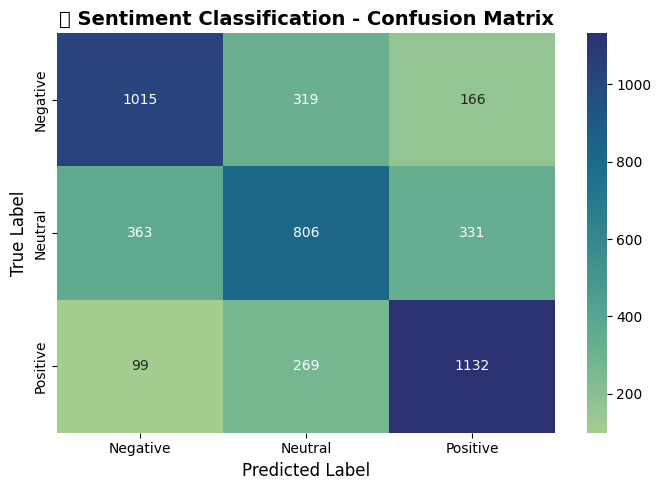

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = ['Negative', 'Neutral', 'Positive']

# Create a figure
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=labels, yticklabels=labels)

plt.title("💬 Sentiment Classification - Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()
